Задание 1

In [ ]:
import numpy
def linan():
  val = [float(i) for i in input().split()]
  val1 = [float(i) for i in input().split()]
  M1 = numpy.array([val[:2], val1[:2]])
  v1 = numpy.array([val[2:], val1[2:]])
  res = numpy.linalg.solve(M1, v1)
  return print("answer: " + str(res[0][0]) + " " + str(res[1][0]))
linan()



1 2 8
8 2 1
answer: -1.0 4.5


Задание 2


In [ ]:
def decorate_matrix():
  n = input()
  if not n.isnumeric():
   print("Not integer")
   return
  elif int(n) <= 1:
   print("Not bigger then 1")
   return
  n = int(n)
  A = numpy.ones((n, n))
  A[1:n-1, 1:n-1]=0
  return A
decorate_matrix()

6


array([[1., 1., 1., 1., 1., 1.],
       [1., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 1.],
       [1., 1., 1., 1., 1., 1.]])

Задание 3

In [ ]:
from math import *
ai = float(input())
bi = float(input())
def f(x):
    return (x+ai)**2 - bi
def g(x):
    return abs(f(x))

def dichotomy(func, a, b, eps):
    c = (a + b) / 2
    sigma = eps / 3
    while b - a > eps:
        x1 = c - sigma
        x2 = c + sigma
        if func(x1) > func(x2):
            a = x2
        else:
            b = x1
        c = (a + b) / 2
    return c
min_1g = dichotomy(g,-ai-10, -ai+10, 1.49e-8)
min_2g = dichotomy(g, min_1g, -ai+10, 1.49e-8)
min_f = dichotomy(f, -ai-10, -ai+10,1.49e-8)
print(ceil(min_f), ceil(min_1g), ceil(min_2g))


10
11
-10 -13 -6


Задание 4

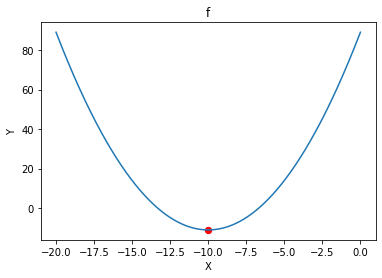

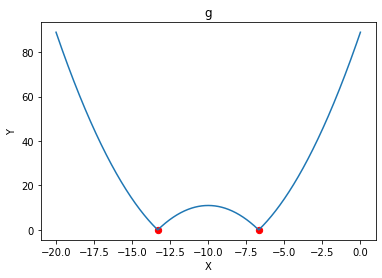

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
x = np.linspace(-ai-10, -ai+10, 1000)
y1 = list(map(f, x))
y2 = list(map(g, x))

minimum_f = min_f
minimum_1g = min_1g
minimum_2g = min_2g
plt.plot(x, y1)
plt.title("f")
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(minimum_f, f(minimum_f), color='r', s=40)
plt.show()

plt.plot(x, y2)
plt.title("g")
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(minimum_1g, g(minimum_1g), color='r', s=40)
plt.scatter(minimum_2g, g(minimum_2g), color='r', s=40)
plt.show()


Задание 5

1000 человек бросают монетку. Каждый бросил 10 раз подряд.

 1. Какова вероятность того, что хотя бы у одного человека монетка выпала 10 раз подряд той же самой сторой (орлом или решкой)? 
 2. Какова вероятность того, что хотя бы у одного человека монетка выпала 8 раз подряд той же самой сторой (орлом или решкой)? 
 3. Какова вероятность того, что ровно у троих человек из 1000 монетка выпала 10 раз подряд той же самой сторой (орлом или решкой)?

In [ ]:
import numpy
import random
import itertools

# количество бросков n
# количество человек m
def calcA(m, n):
  # вероятность, что у одного человека выпала монетка n раз подряд той же самой стороной
  p1 = 0.5 ** (n - 1)

  # монетка не выпала n раз подряд той же самой стороной
  q1 = 1 - p1

  # вероятность, что ни у кого не выпала n раз подряд из m человек
  p2 = q1 ** m

  # вероятность, что хотя бы у одного выпала монетка n раз подряд из m человек
  return 1 - p2

# случайные три человека из 1000 - перестановка C из n по k(формула Бернулли)
def calcC(m, n):
  c = 1
  d = 3
  p1 = 0.5 ** (n - 1)
  q1 = 1 - p1
  for i in range(0, d):
    c = c * (m - i)
  for i in range(0, d):
    c = c / (i + 1)
  return (p1 ** d) * (q1 ** (m - d)) * c

# Симуляция
def calcB(m, n, s):
  a = 0
  b = 5000 #число опытов
  for i in range(0, b):
    z = 0
    for j in range(0, m):
      r = 0
      for k in range(0, n-1):
        if random.random() < 0.5:
          r = r + 1
      if r == n-1:
        z = z + 1
    if s == 0 and z > 0:
      a = a + 1
    if s == 1 and z == 3:
      a = a + 1
  return a / b

print('1a)', str(calcA(1000, 10)))
print('2a)', str(calcA(1000, 8)))
print('3a)', str(calcC(1000, 10)))

print('1b)', str(calcB(1000, 10, 0)))
print('2b)', str(calcB(1000, 8, 0)))
print('3b)', str(calcB(1000, 10, 1)))


1a) 0.858440454732242
2a) 0.9996075798421896
3a) 0.1762873858121736
1b) 0.865
2b) 0.9992
3b) 0.1742
